In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = {

    "Company": [
        "Waterstones", "Waterstones", "Waterstones", "Waterstones", "Waterstones",
        "WHSmith", "WHSmith", "WHSmith", "WHSmith", "WHSmith"
    ],

    "Book": [
        "Hyperion",
        "Fall of Hyperion",
        "Endymion",
        "Ilium",
        "The Terror",
        "Hyperion",
        "Fall of Hyperion",
        "Endymion",
        "Ilium",
        "The Terror"
    ],

    "Price (£)": [
        10, 11, 10, 12, 11,
        9, 10, 9, 11, 10
    ],

    "Weekly Units Sold": [
        120, 95, 80, 60, 70,
        90, 75, 65, 50, 55
    ],

    "Profit Margin (%)": [
        40, 40, 40, 40, 40,
        30, 30, 30, 30, 30
    ],

    "Customer Age Group": [
        "25-34",
        "35-44",
        "25-34",
        "18-24",
        "35-44",
        "18-24",
        "25-34",
        "18-24",
        "35-44",
        "25-34"
    ]
}

df = pd.DataFrame(data)

df


,Company,Book,Price (£),Weekly Units Sold,Profit Margin (%),Customer Age Group
0,Waterstones,Hyperion,10,120,40,25-34
1,Waterstones,Fall of Hyperion,11,95,40,35-44
2,Waterstones,Endymion,10,80,40,25-34
3,Waterstones,Ilium,12,60,40,18-24
4,Waterstones,The Terror,11,70,40,35-44
5,WHSmith,Hyperion,9,90,30,18-24
6,WHSmith,Fall of Hyperion,10,75,30,25-34
7,WHSmith,Endymion,9,65,30,18-24
8,WHSmith,Ilium,11,50,30,35-44
9,WHSmith,The Terror,10,55,30,25-34


In [3]:
df["Weekly Profit (£)"] = (
    df["Price (£)"] *
    df["Weekly Units Sold"] *
    (df["Profit Margin (%)"] / 100)
)

df


,Company,Book,Price (£),Weekly Units Sold,Profit Margin (%),Customer Age Group,Weekly Profit (£)
0,Waterstones,Hyperion,10,120,40,25-34,480.0
1,Waterstones,Fall of Hyperion,11,95,40,35-44,418.0
2,Waterstones,Endymion,10,80,40,25-34,320.0
3,Waterstones,Ilium,12,60,40,18-24,288.0
4,Waterstones,The Terror,11,70,40,35-44,308.0
5,WHSmith,Hyperion,9,90,30,18-24,243.0
6,WHSmith,Fall of Hyperion,10,75,30,25-34,225.0
7,WHSmith,Endymion,9,65,30,18-24,175.5
8,WHSmith,Ilium,11,50,30,35-44,165.0
9,WHSmith,The Terror,10,55,30,25-34,165.0


In [4]:
df["Yearly Profit (£)"] = df["Weekly Profit (£)"] * 52

df


,Company,Book,Price (£),Weekly Units Sold,Profit Margin (%),Customer Age Group,Weekly Profit (£),Yearly Profit (£)
0,Waterstones,Hyperion,10,120,40,25-34,480.0,24960.0
1,Waterstones,Fall of Hyperion,11,95,40,35-44,418.0,21736.0
2,Waterstones,Endymion,10,80,40,25-34,320.0,16640.0
3,Waterstones,Ilium,12,60,40,18-24,288.0,14976.0
4,Waterstones,The Terror,11,70,40,35-44,308.0,16016.0
5,WHSmith,Hyperion,9,90,30,18-24,243.0,12636.0
6,WHSmith,Fall of Hyperion,10,75,30,25-34,225.0,11700.0
7,WHSmith,Endymion,9,65,30,18-24,175.5,9126.0
8,WHSmith,Ilium,11,50,30,35-44,165.0,8580.0
9,WHSmith,The Terror,10,55,30,25-34,165.0,8580.0


In [5]:
company_comparison = df.groupby("Company")[[
    "Weekly Profit (£)",
    "Yearly Profit (£)",
    "Weekly Units Sold"
]].sum()

company_comparison


,Weekly Profit (£),Yearly Profit (£),Weekly Units Sold
Company,,,
WHSmith,973.5,50622.0,335
Waterstones,1814.0,94328.0,425


In [6]:
demographics = df.groupby("Customer Age Group")[
    "Weekly Units Sold"
].sum()

demographics


Customer Age Group
18-24    215
25-34    330
35-44    215
Name: Weekly Units Sold, dtype: int64

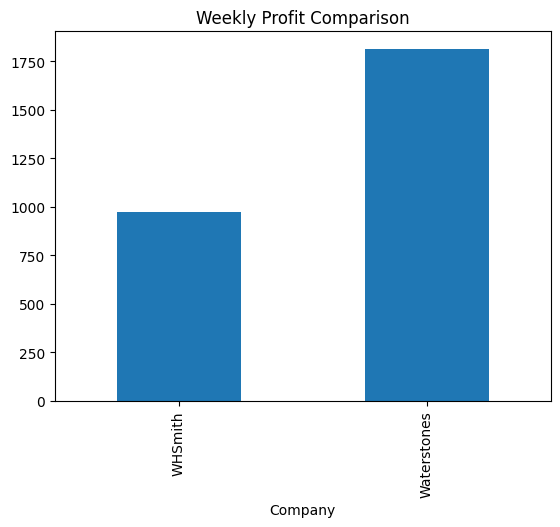

In [7]:
company_comparison["Weekly Profit (£)"].plot(
    kind="bar",
    title="Weekly Profit Comparison"
)

plt.show()


In [8]:
waterstones_profit = company_comparison.loc["Waterstones", "Yearly Profit (£)"]
whsmith_profit = company_comparison.loc["WHSmith", "Yearly Profit (£)"]

print("Waterstones yearly profit:", waterstones_profit)
print("WHSmith yearly profit:", whsmith_profit)

if waterstones_profit > whsmith_profit:
    print("Waterstones makes more profit from Dan Simmons books.")
else:
    print("WHSmith makes more profit.")


Waterstones yearly profit: 94328.0
WHSmith yearly profit: 50622.0
Waterstones makes more profit from Dan Simmons books.


In [9]:
df["City"] = ["London", "Manchester", "Liverpool", "Birmingham", "Leeds",
              "London", "Manchester", "Liverpool", "Birmingham", "Leeds"]
